## Data Viz de los Datos


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Desactivar notación científica en pandas
pd.options.display.float_format = '{:,.0f}'.format

# Desactivar notación científica en numpy
np.set_printoptions(suppress=True)

In [21]:
# Cargar los datos
data = pd.read_csv('bbdd/final2.csv', sep=';')
data['marca'] = data['equipo'].str.split(" ").str[0]

In [22]:
# Calcular el precio promedio por marca
data_promedio = (
    data.groupby("marca")
    .agg(precio_promedio=("precio", "mean"))
    .reset_index()
    .sort_values(by="precio_promedio", ascending=False)
)


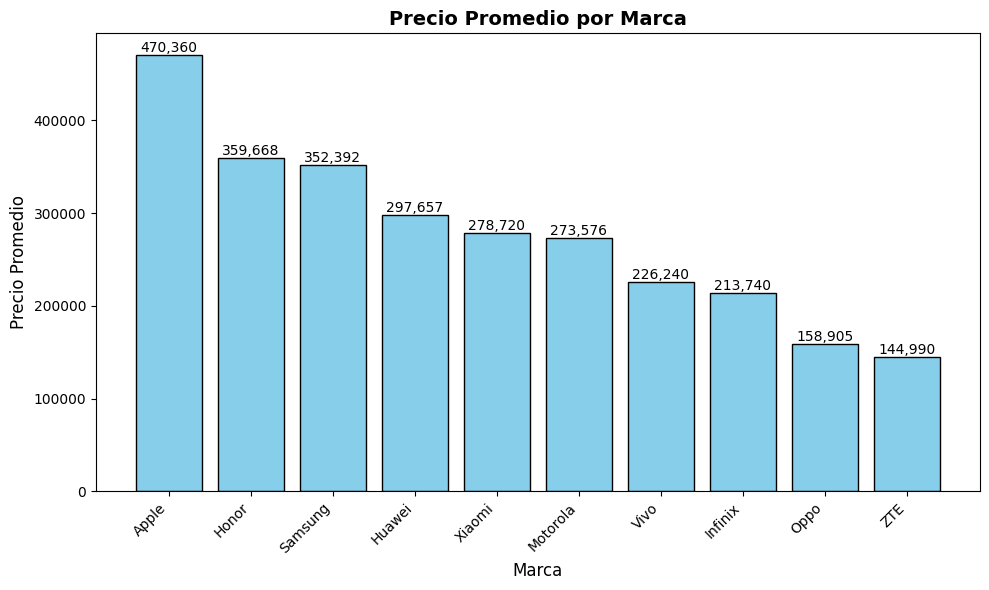

In [23]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(
    data_promedio["marca"],
    data_promedio["precio_promedio"],
    color='skyblue',
    edgecolor='black'
)

# Agregar etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f"{height:,.0f}",
             ha="center", va="bottom", fontsize=10)

# Personalizar el gráfico
plt.title("Precio Promedio por Marca", fontsize=14, fontweight="bold")
plt.xlabel("Marca", fontsize=12)
plt.ylabel("Precio Promedio", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Mostrar el gráfico
plt.show()


/var/folders/hg/s4skq8ks6g1fy2jw2fdkp0840000gn/T/ipykernel_40671/375837693.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Tienda", loc="upper center", fontsize=9)


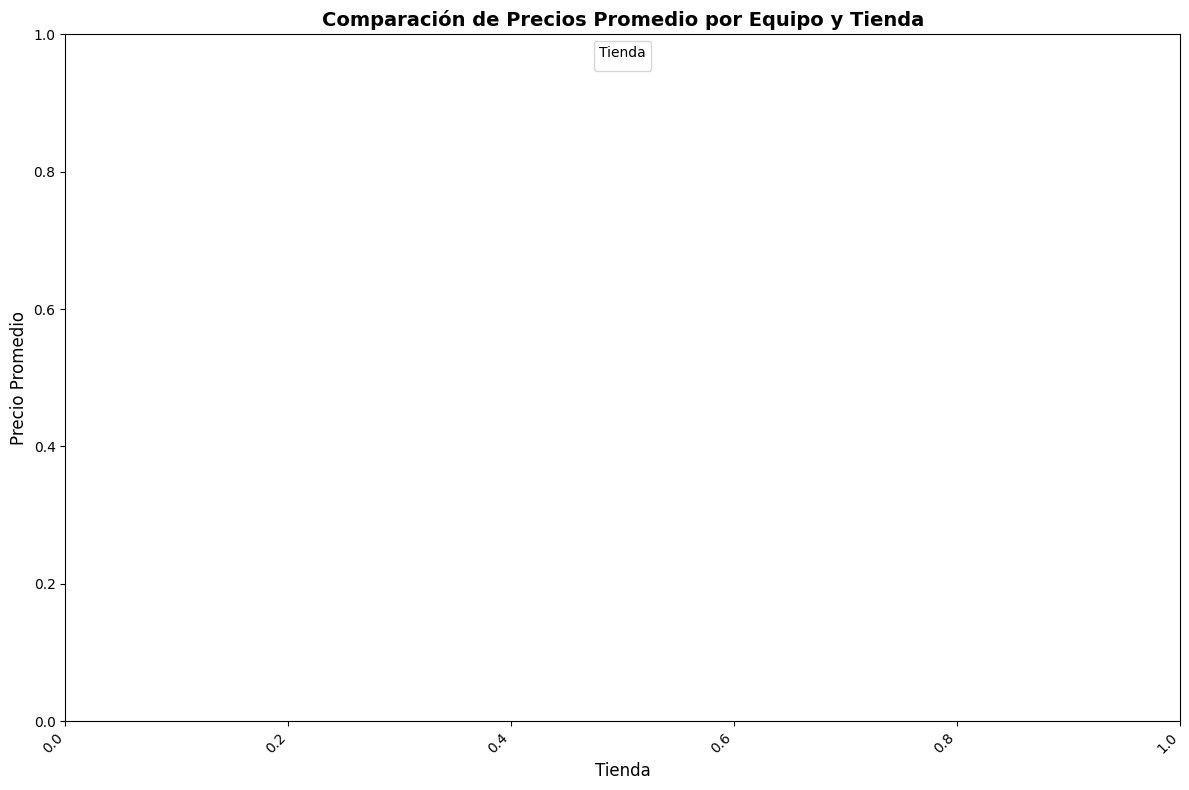

In [27]:
# Filtrar para incluir solo las tiendas Hites y Líder
data_filtered = data[data['tienda'].isin(["Hites", "Lider"])]

# Agrupar por equipo y verificar que el equipo esté en ambas tiendas
data_filtered = (
    data_filtered.groupby('equipo')
    .filter(lambda x: x['tienda'].nunique() == 2)
)

# Limpiar los nombres de los equipos removiendo el texto entre paréntesis
data_filtered['equipo'] = data_filtered['equipo'].str.replace(r"\s*\(.*\)", "", regex=True)

# Agrupar nuevamente por tienda y equipo para calcular el promedio de precio
data_promedio = (
    data_filtered.groupby(['tienda', 'equipo'])
    .agg(precio_promedio=('precio', 'mean'))
    .reset_index()
)

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(
    data=data_promedio,
    x='tienda',
    y='precio_promedio',
    hue='tienda',
    dodge=True,
    palette={"Hites": "dodgerblue", "Lider": "tomato"}
)

# Añadir etiquetas a las barras
for index, row in data_promedio.iterrows():
    plt.text(
        index % 2, 
        row['precio_promedio'], 
        f"{row['precio_promedio']:,.0f}", 
        ha='center', 
        va='bottom', 
        fontsize=8
    )

# Configurar el título y etiquetas
plt.title("Comparación de Precios Promedio por Equipo y Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Precio Promedio", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.tight_layout()
plt.legend(title="Tienda", loc="upper center", fontsize=9)
plt.show()

/var/folders/hg/s4skq8ks6g1fy2jw2fdkp0840000gn/T/ipykernel_40671/293663064.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celulares_unicos['marca'] = celulares_unicos['equipo'].apply(lambda x: re.match(r"^[A-Za-z]+", x).group())
/var/folders/hg/s4skq8ks6g1fy2jw2fdkp0840000gn/T/ipykernel_40671/293663064.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


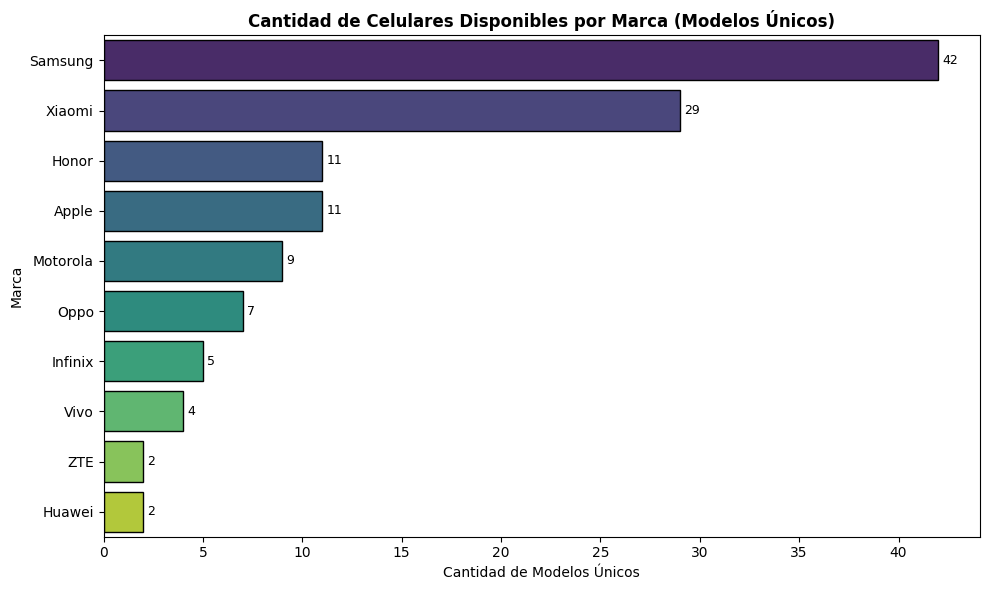

In [28]:

# Mantener solo los registros únicos por modelo de celular
celulares_unicos = data.drop_duplicates(subset="equipo")

# Contar el número de celulares únicos por marca
celulares_unicos['marca'] = celulares_unicos['equipo'].apply(lambda x: re.match(r"^[A-Za-z]+", x).group())
conteo_marcas = celulares_unicos['marca'].value_counts().reset_index()
conteo_marcas.columns = ['marca', 'n']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    data=conteo_marcas,
    y='marca',
    x='n',
    palette="viridis",
    edgecolor="black"
)

# Añadir etiquetas a las barras
for index, row in conteo_marcas.iterrows():
    plt.text(row['n'] + 0.2, index, f"{row['n']}", va='center', fontsize=9)

# Configurar el título y etiquetas
plt.title("Cantidad de Celulares Disponibles por Marca (Modelos Únicos)", fontsize=12, fontweight="bold")
plt.xlabel("Cantidad de Modelos Únicos", fontsize=10)
plt.ylabel("Marca", fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()